In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/german-credit/german_credit_data.csv


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns 
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
import plotly.express as px 
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Data Explore

### In this Bank Credit Risk Analysis. I want to group customers into two group which are good credit and bad credit customer.

Below the list is the dataset columns:
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - 
4. skilled, 3 - highly skilled)
5. Housing (text: own, rent, or free)
6. Saving accounts (text - little, moderate, quite rich, rich)
7. Checking account (numeric, in DM - Deutsch Mark)
8. Credit amount (numeric, in DM)
9. Duration (numeric, in month)
10. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [60]:
df = pd.read_csv('/kaggle/input/german-credit/german_credit_data.csv')

In [61]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [63]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [64]:
df.duplicated().sum()

0

In [65]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

# EDA

In [66]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


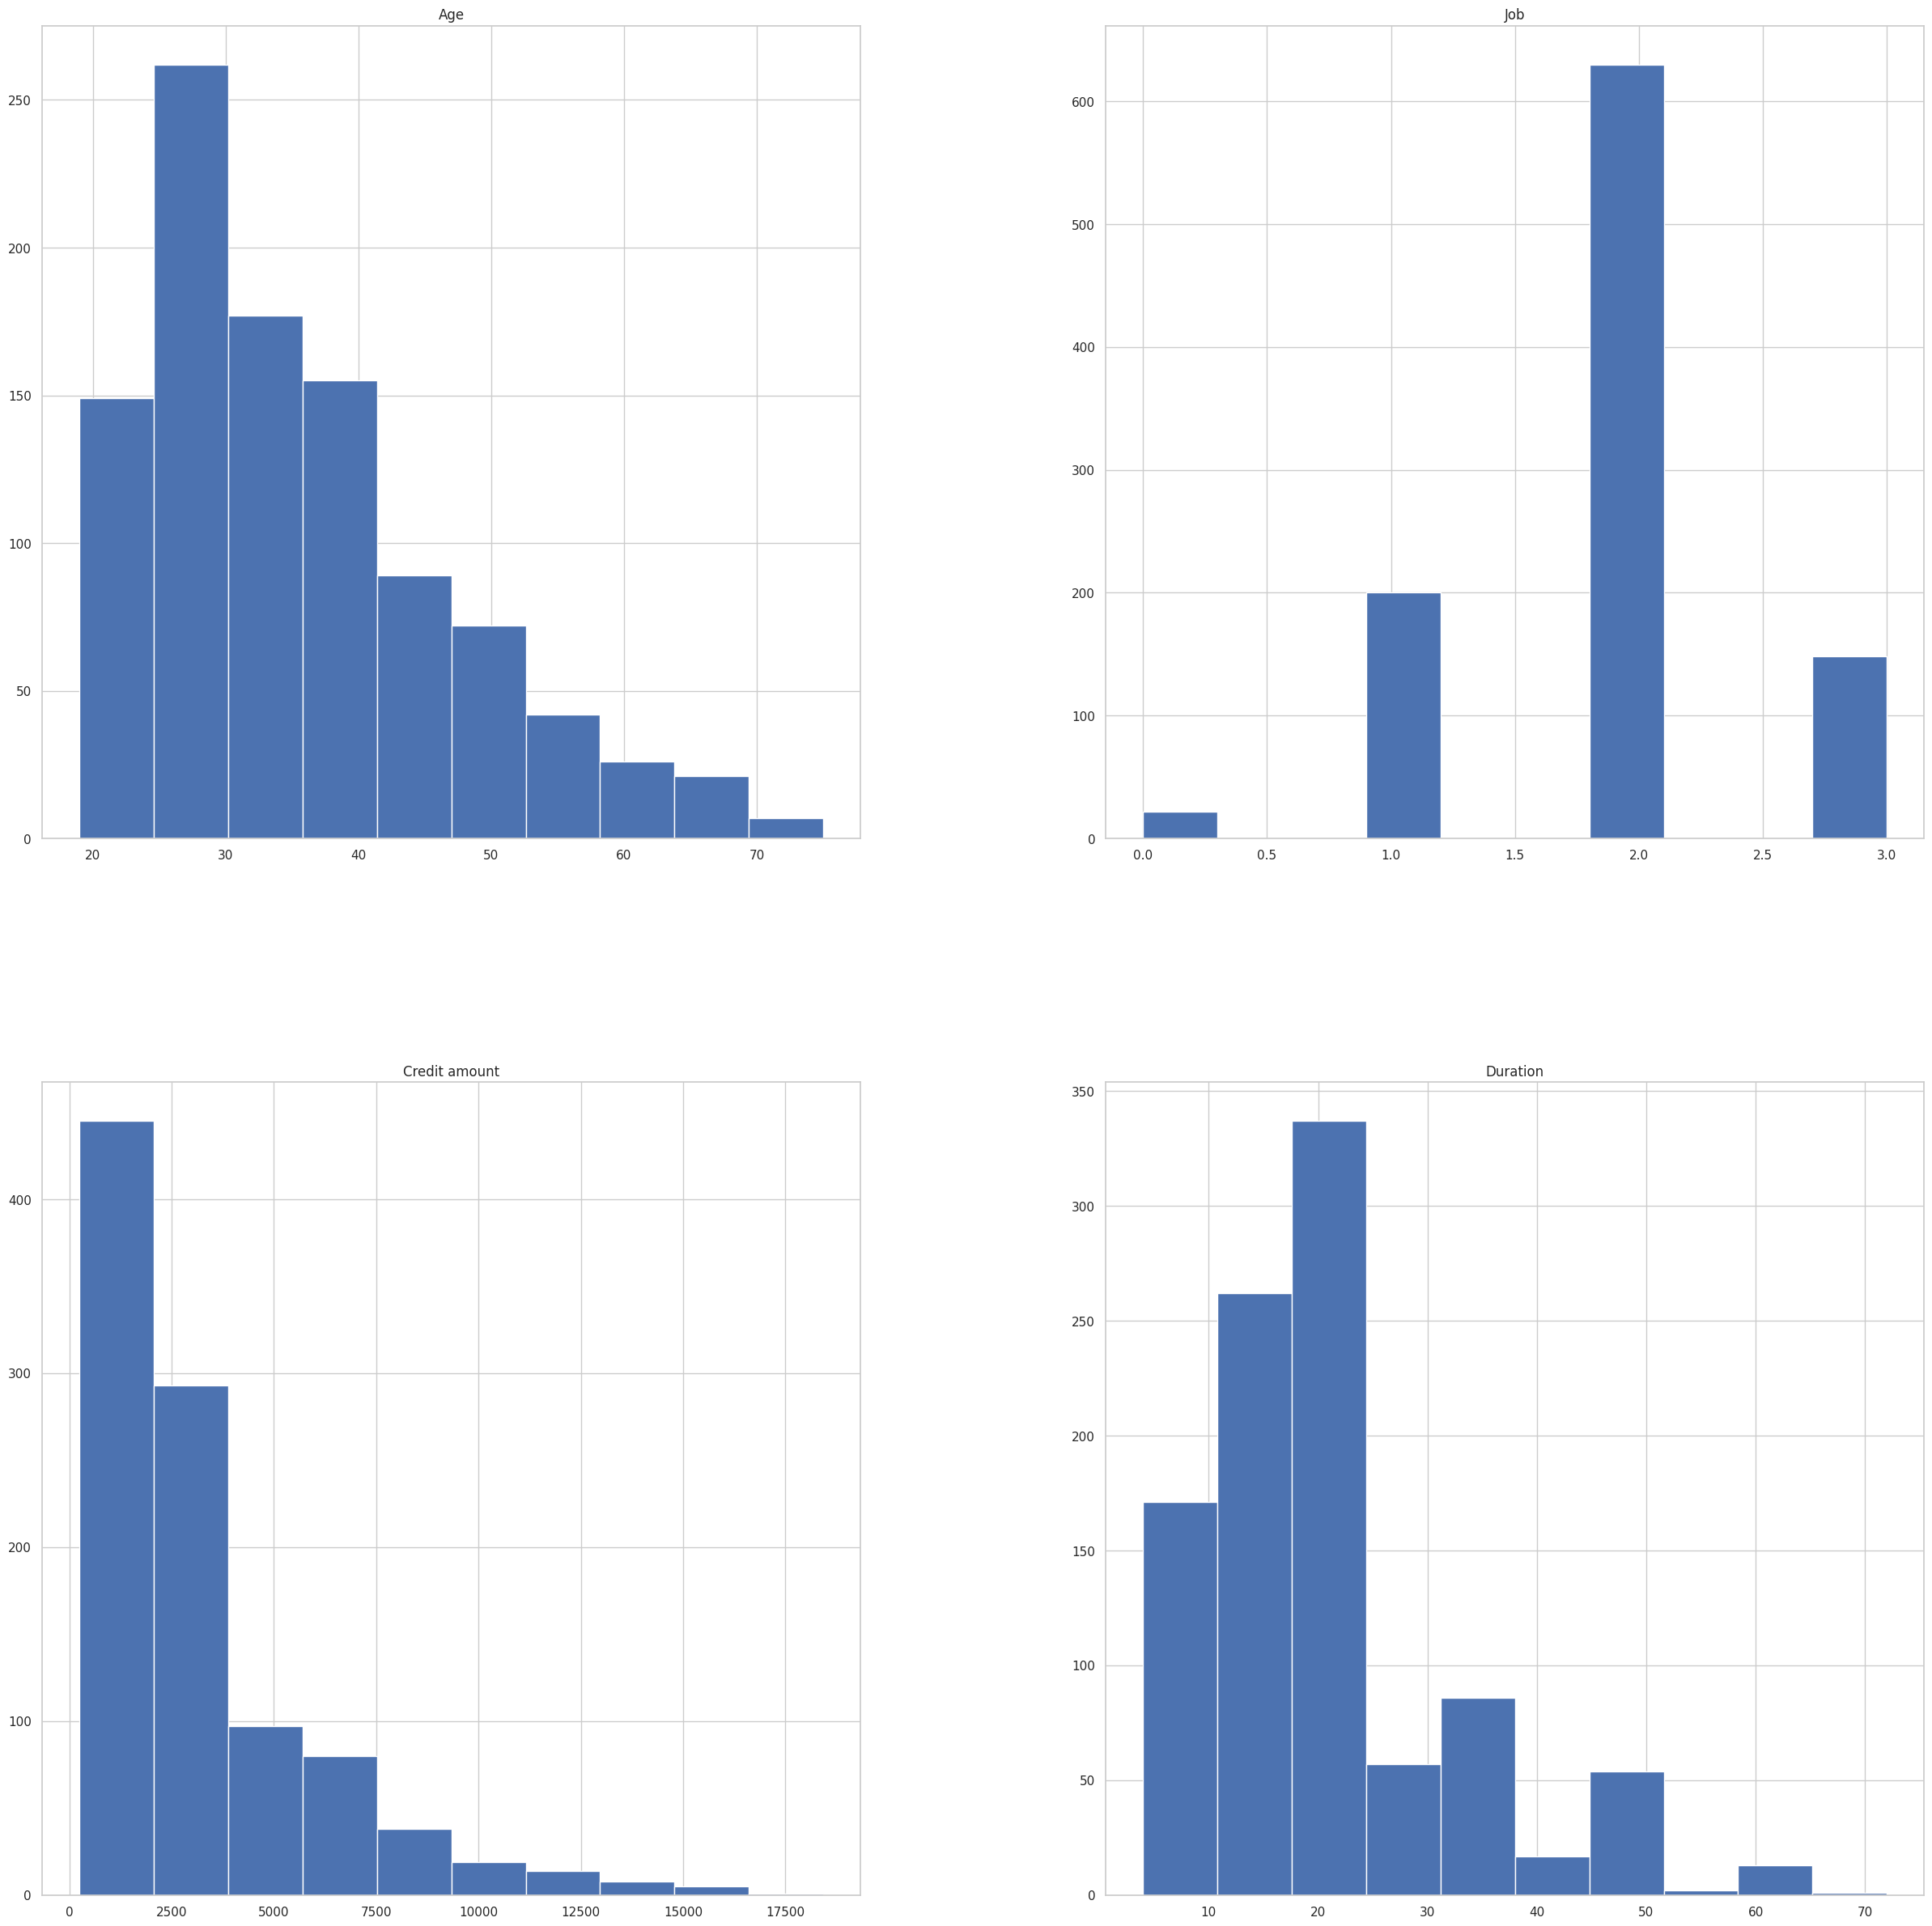

In [67]:
df.hist(figsize = (30,30))
plt.show()

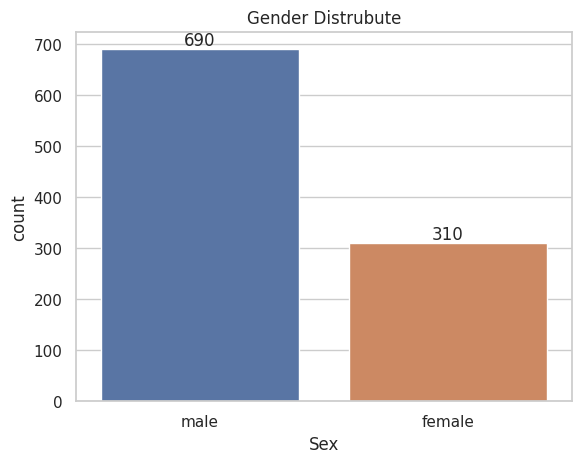

In [68]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')
plt.show()

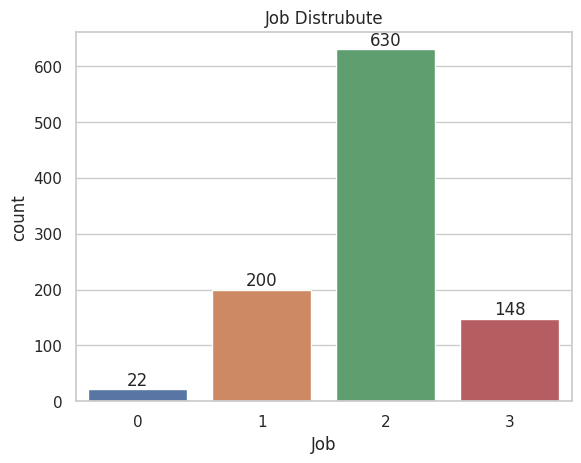

In [69]:
sns.countplot(x='Job', data=df)
plt.title('Job Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

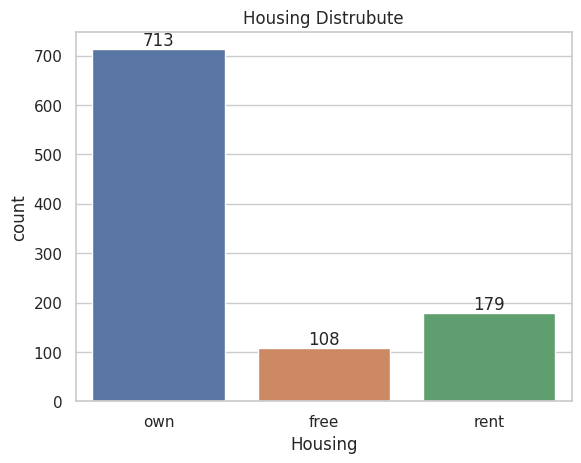

In [70]:
sns.countplot(x='Housing', data=df)
plt.title('Housing Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

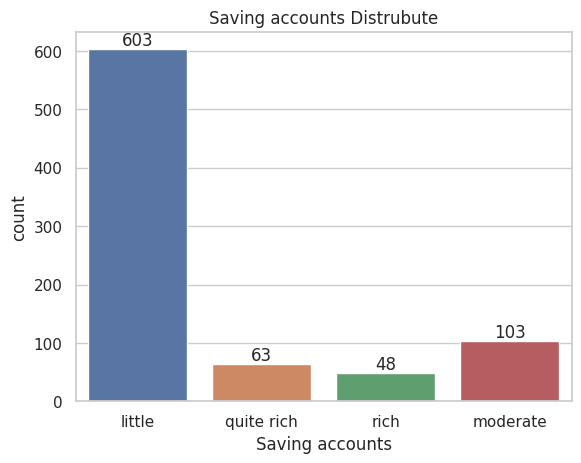

In [71]:
sns.countplot(x='Saving accounts', data=df)
plt.title('Saving accounts Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')


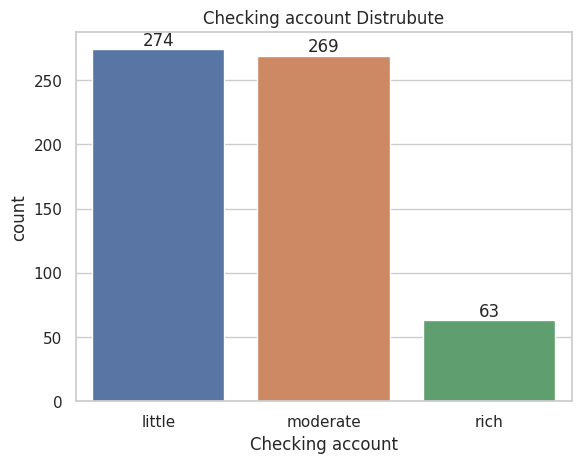

In [72]:
sns.countplot(x='Checking account', data=df)
plt.title('Checking account Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

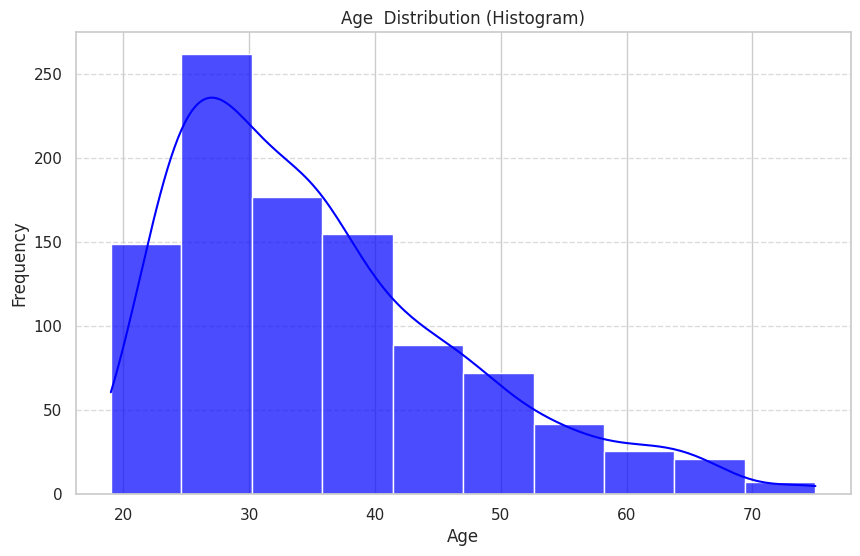

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=10, color='blue', alpha=0.7, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age  Distribution (Histogram)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

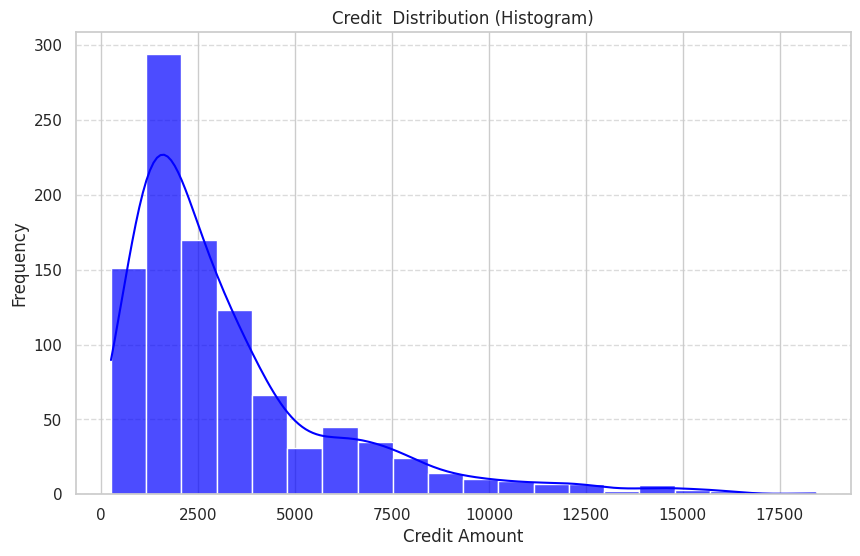

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Credit amount', bins=20, color='blue', alpha=0.7, kde=True)
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.title('Credit  Distribution (Histogram)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

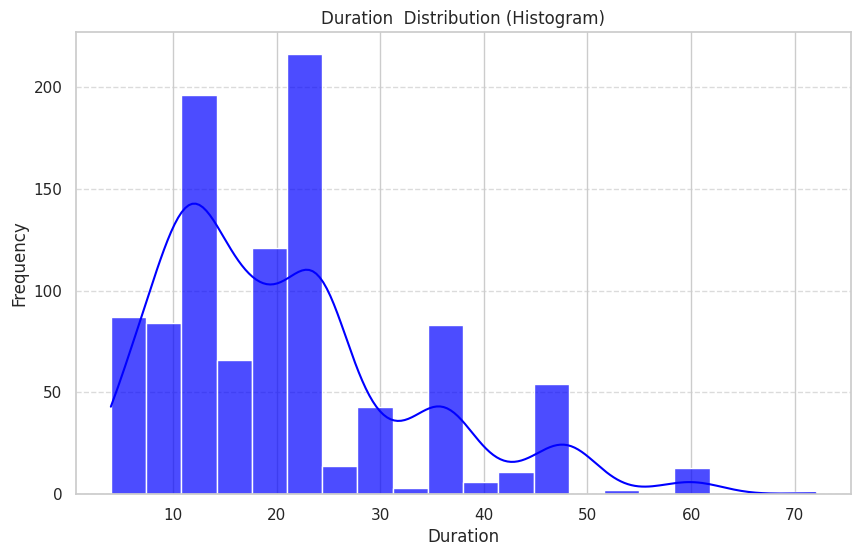

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Duration', bins=20, color='blue', alpha=0.7, kde=True)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Duration  Distribution (Histogram)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

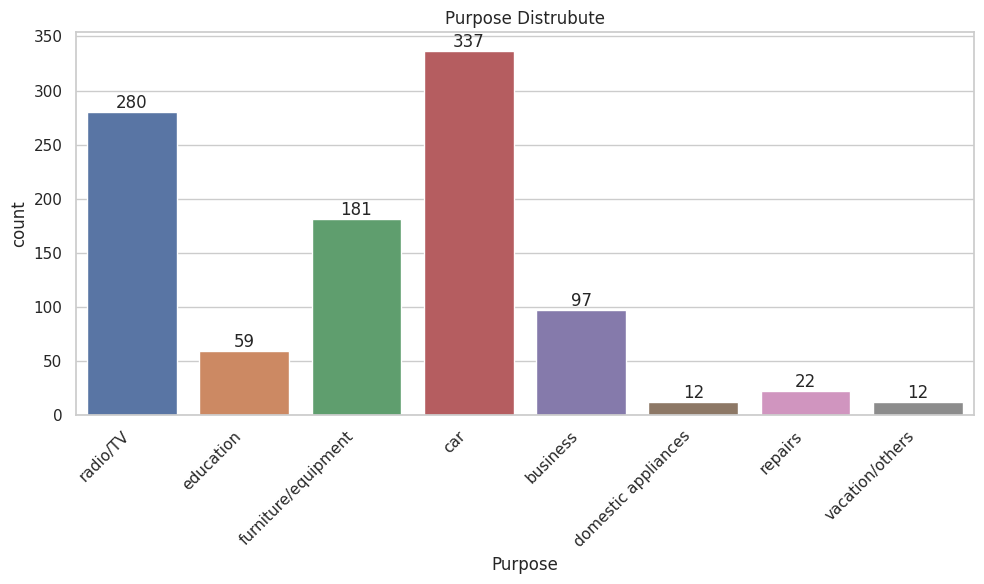

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose', data=df)
plt.title('Purpose Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [77]:
df['Saving accounts'].mode()[0]

'little'

In [78]:
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace=True)

In [79]:
df['Checking account'].mode()[0]

'little'

In [80]:
df['Checking account'].fillna(df['Checking account'].mode()[0], inplace=True)

In [81]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [82]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


# Construct Model 

In [83]:
le = LabelEncoder()

In [84]:
columns_to_encode = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [85]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [86]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [87]:
df_scaled.shape

(1000, 9)

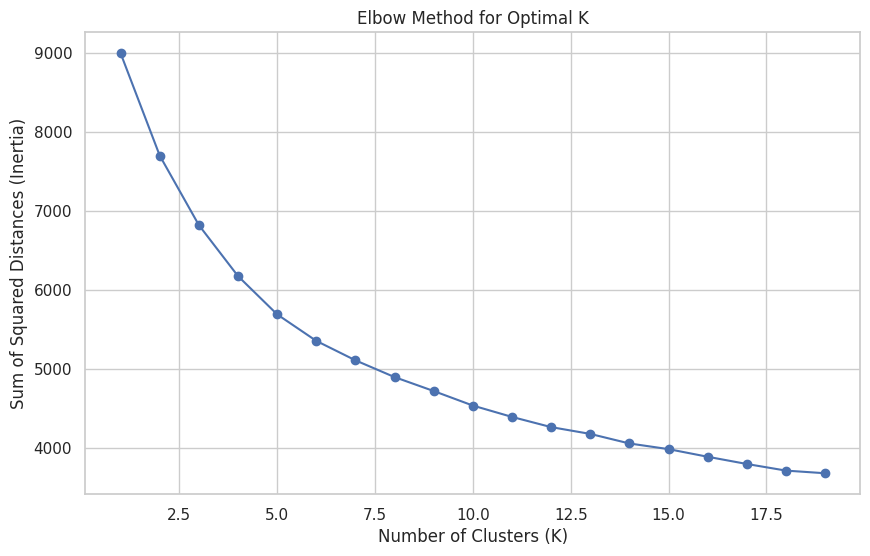

In [88]:

score_1 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i, n_init=10)  
    kmeans.fit(df_scaled)
    score_1.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_values, score_1, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.grid(True)
plt.show()

## Apply K-MEANS Model

In [89]:
kmeans = KMeans(n_clusters=2, n_init=10)  # Explicitly set n_init to suppress the warning
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [90]:
kmeans.cluster_centers_.shape

(2, 9)

In [91]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,-0.063778,-0.101519,-0.198895,0.155826,0.074736,-0.007657,-0.418179,-0.405352,0.117828
1,0.189310,0.301334,0.590372,-0.462531,-0.221835,0.022727,1.241261,1.203188,-0.349742


In [92]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,34.820856,0.643048,1.774064,1.153743,0.433155,0.390374,2091.439840,16.017380,3.110963
1,37.698413,0.829365,2.289683,0.825397,0.194444,0.408730,6773.257937,35.404762,2.186508


In [93]:
labels.shape

(1000,)

In [94]:
labels.max()

1

In [95]:
labels.min()

0

In [96]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [97]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
0,67,1,2,1,0,0,1169,6,5,0
1,22,0,2,1,0,1,5951,48,5,1
2,49,1,1,1,0,0,2096,12,3,0
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,1


In [98]:
df_cluster.cluster.value_counts()

cluster
0    748
1    252
Name: count, dtype: int64

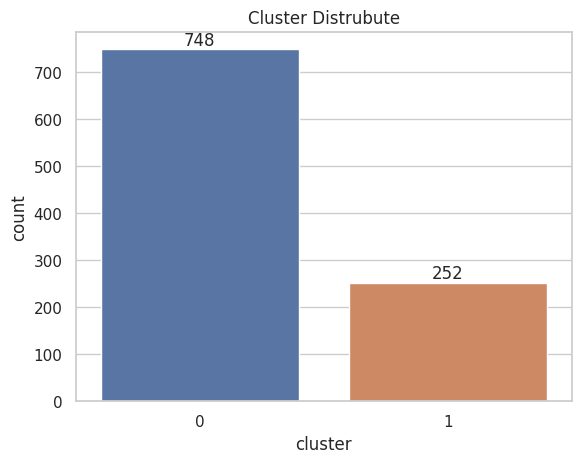

In [99]:
sns.countplot(x='cluster', data=df_cluster)
plt.title('Cluster Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')


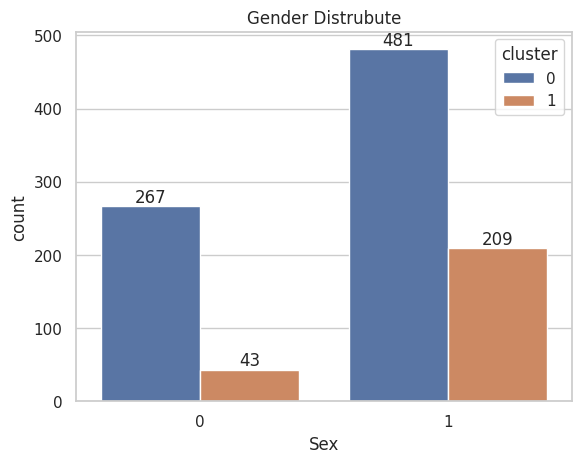

In [100]:
sns.countplot(x='Sex',hue = 'cluster', data=df_cluster)
plt.title('Gender Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

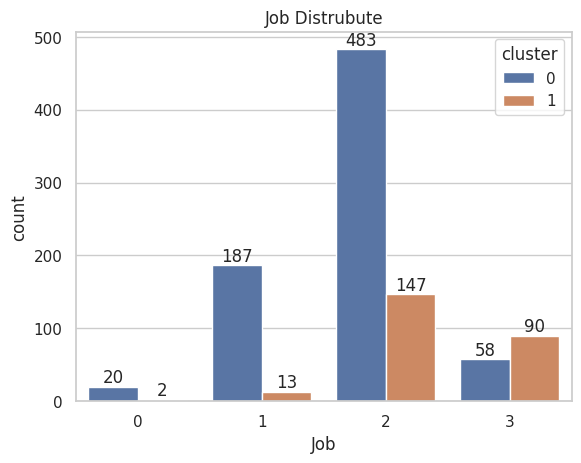

In [101]:
sns.countplot(x='Job',hue = 'cluster', data=df_cluster)
plt.title('Job Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

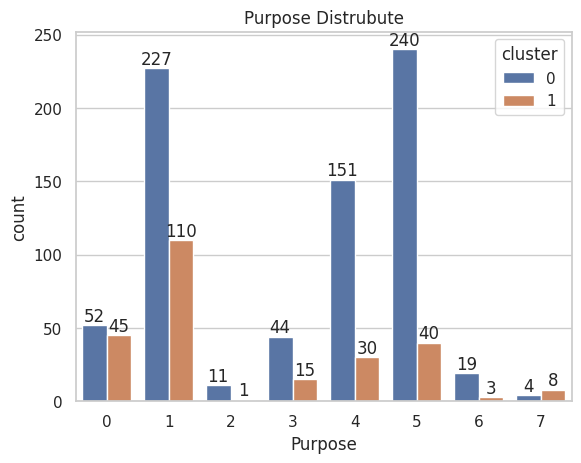

In [102]:
sns.countplot(x='Purpose',hue = 'cluster', data=df_cluster)
plt.title('Purpose Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

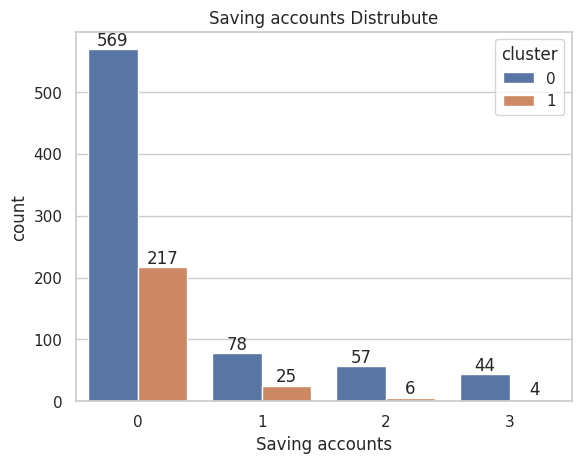

In [103]:
sns.countplot(x='Saving accounts',hue = 'cluster', data=df_cluster)
plt.title('Saving accounts Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

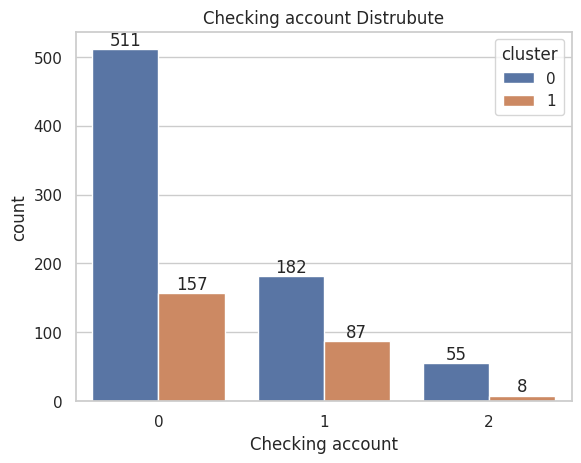

In [104]:
sns.countplot(x='Checking account',hue = 'cluster', data=df_cluster)
plt.title('Checking account Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

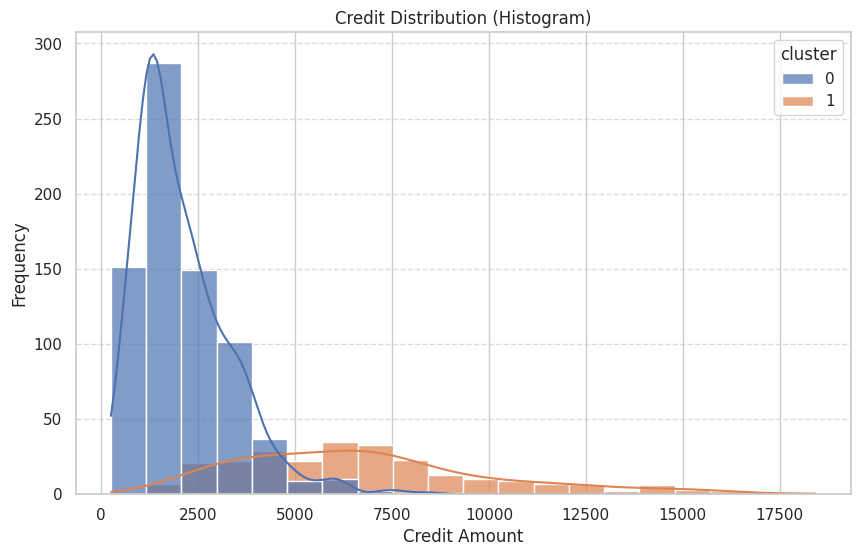

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cluster, x='Credit amount', hue = 'cluster', bins=20, color='blue', alpha=0.7, kde=True)
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.title('Credit Distribution (Histogram)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

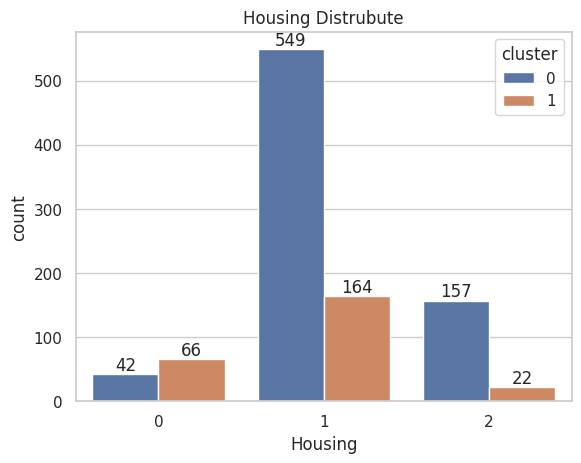

In [106]:
sns.countplot(x='Housing',hue = 'cluster', data=df_cluster)
plt.title('Housing Distrubute')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

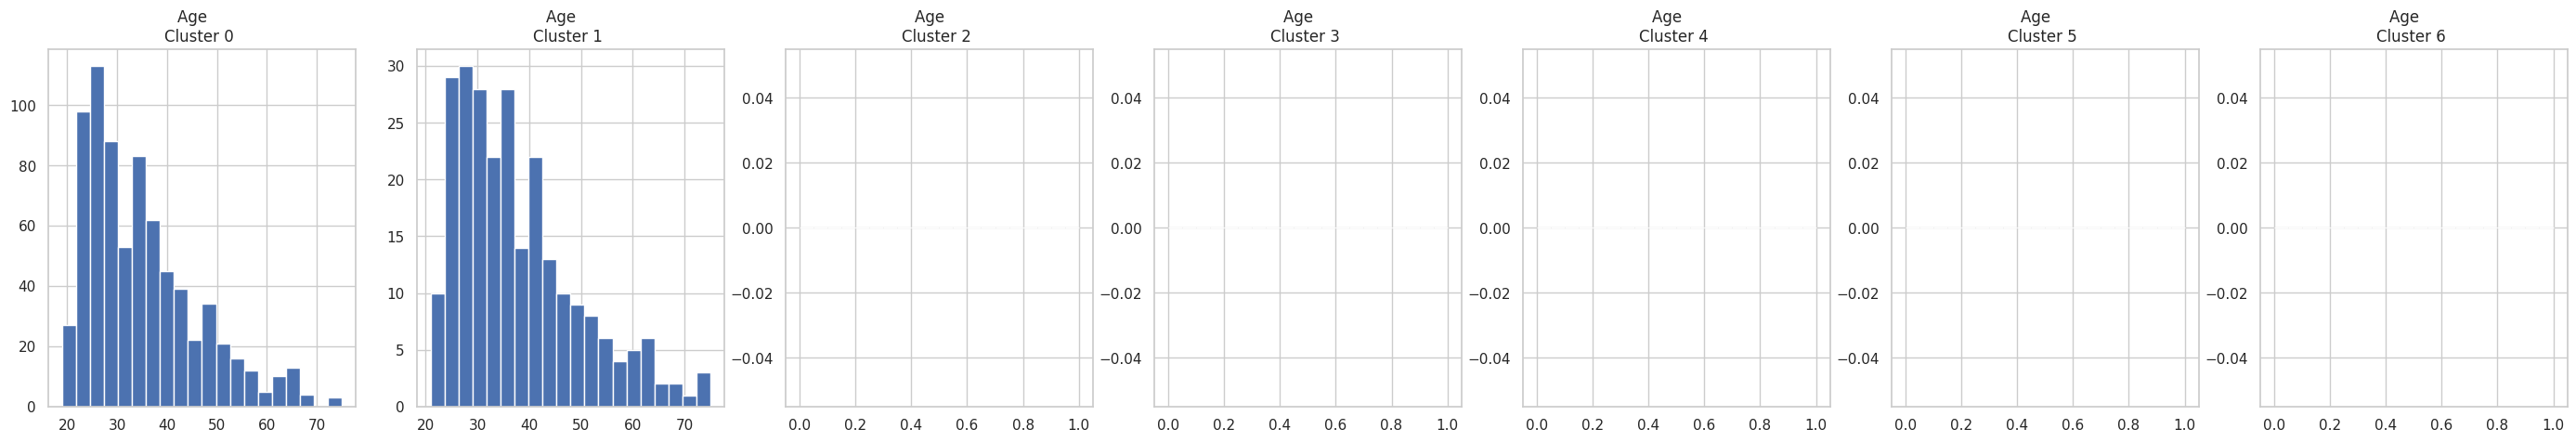

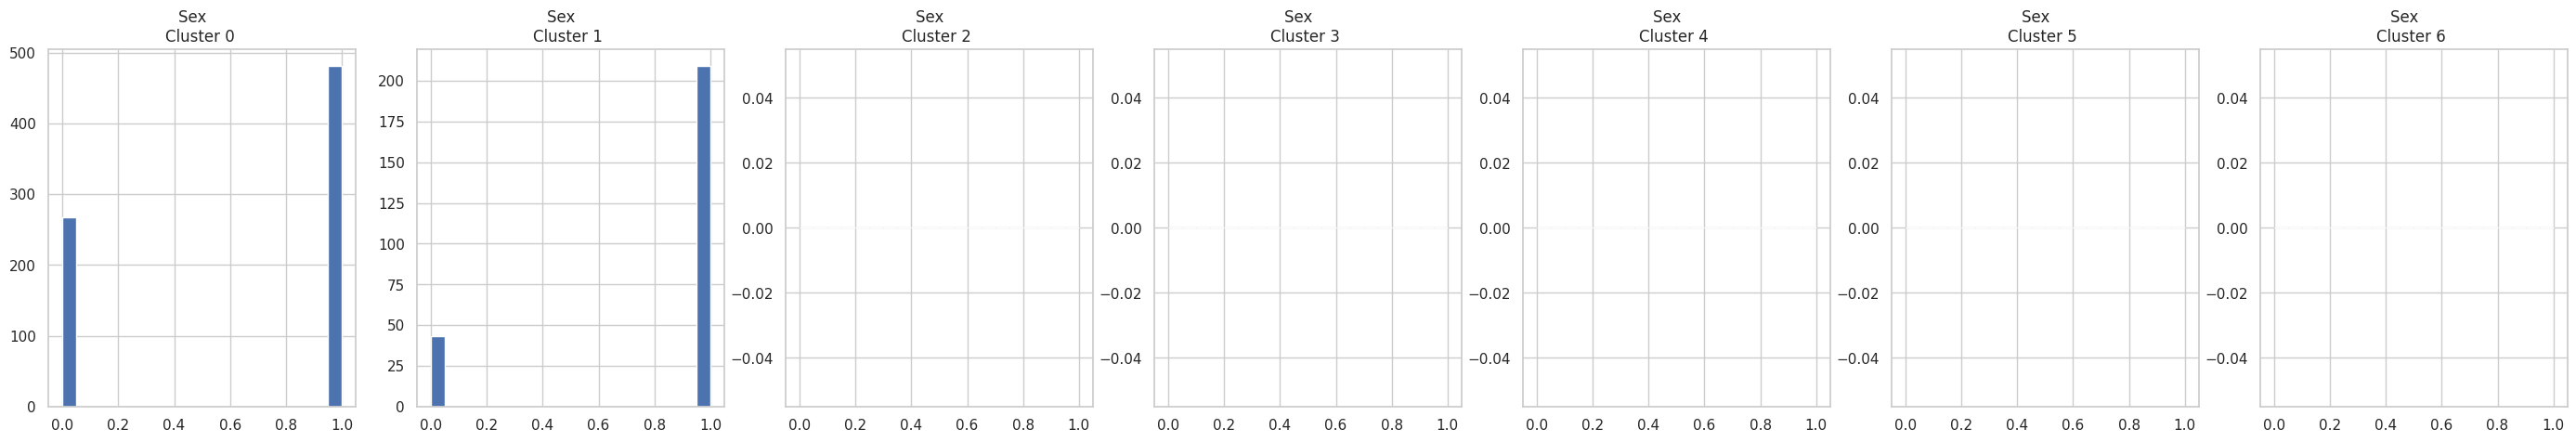

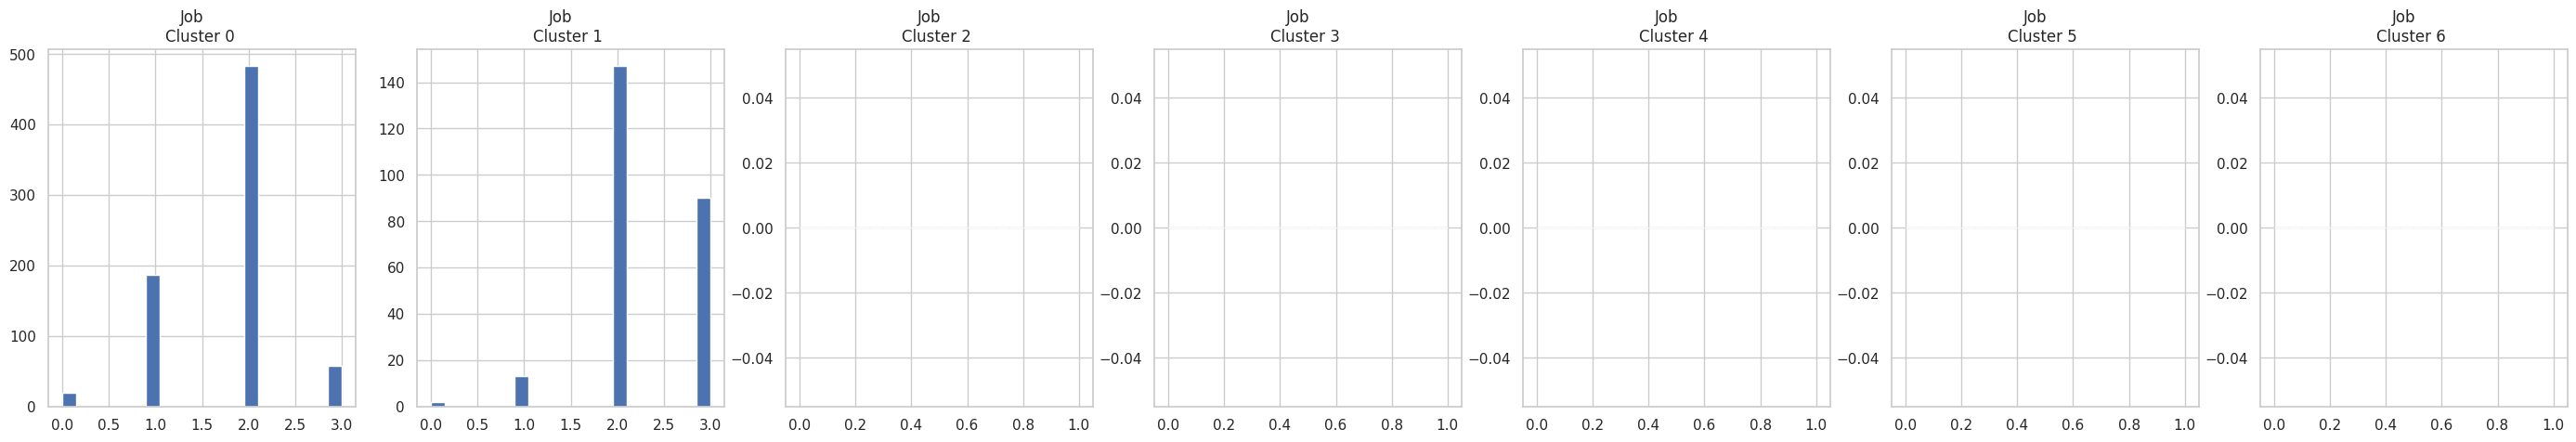

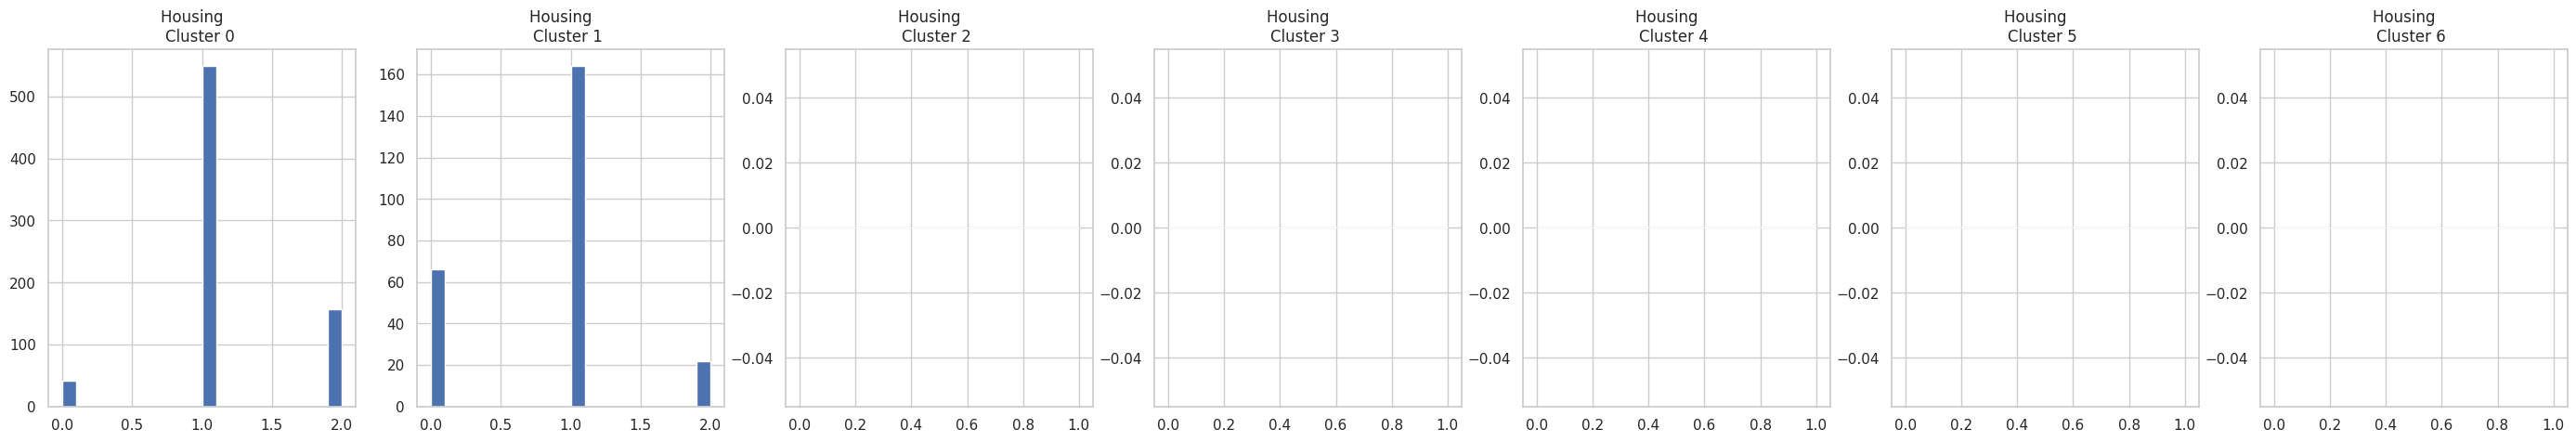

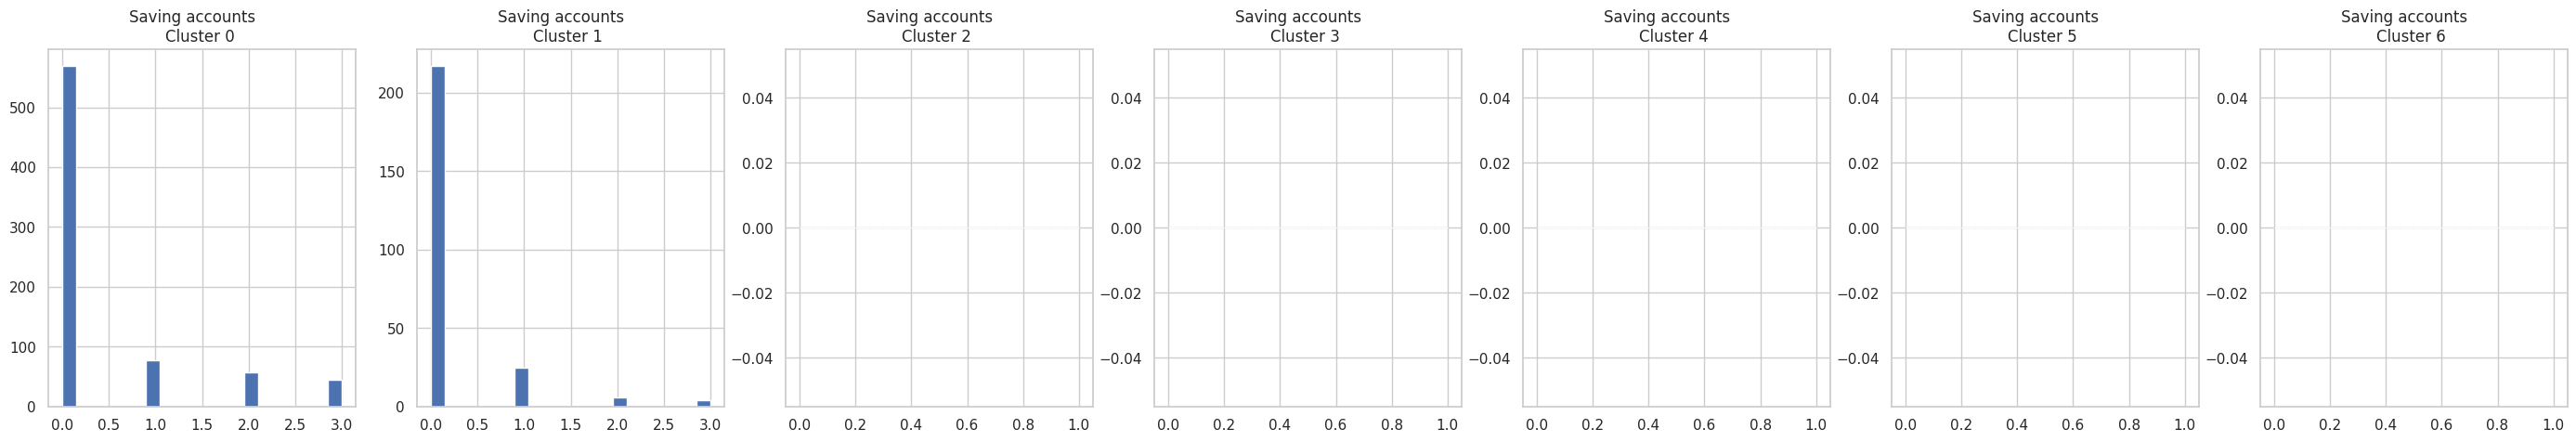

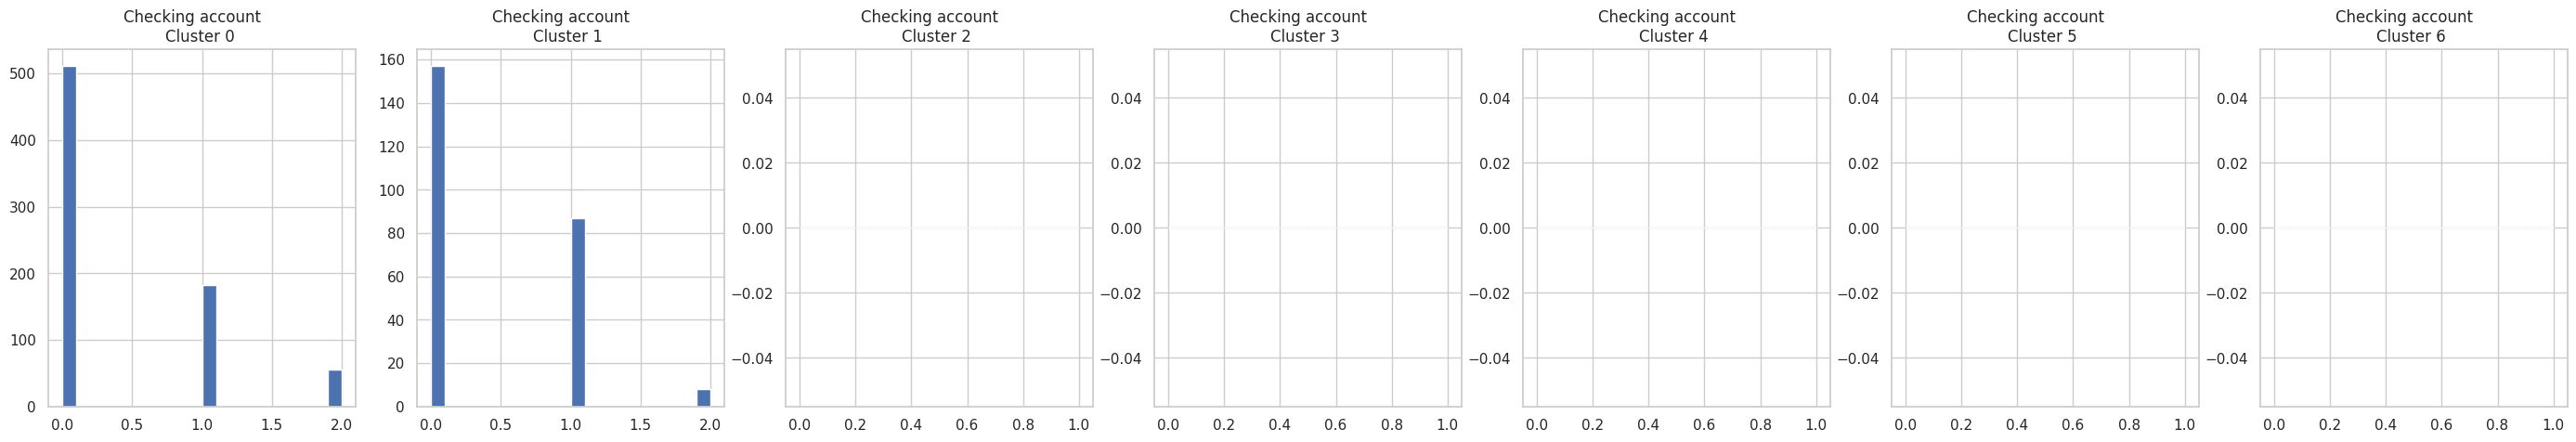

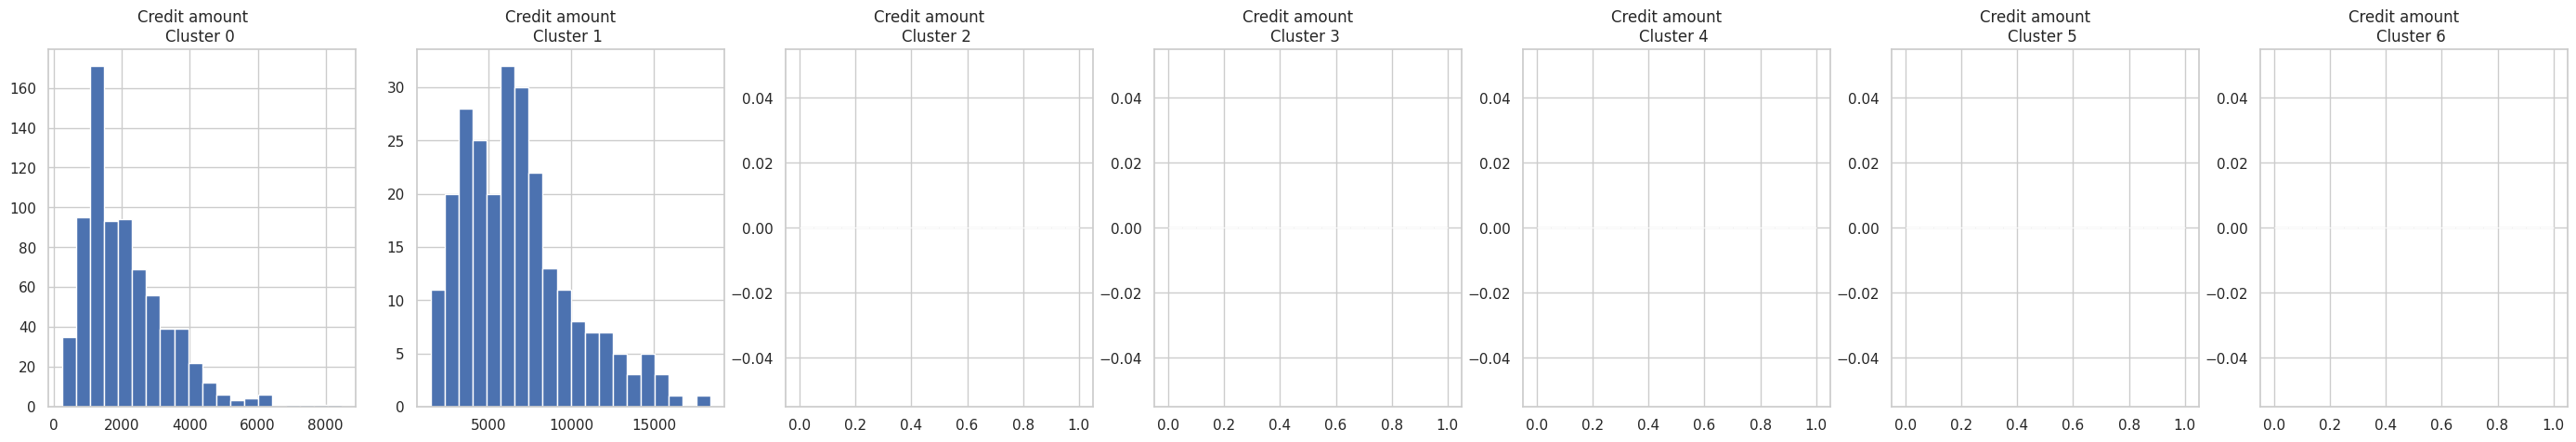

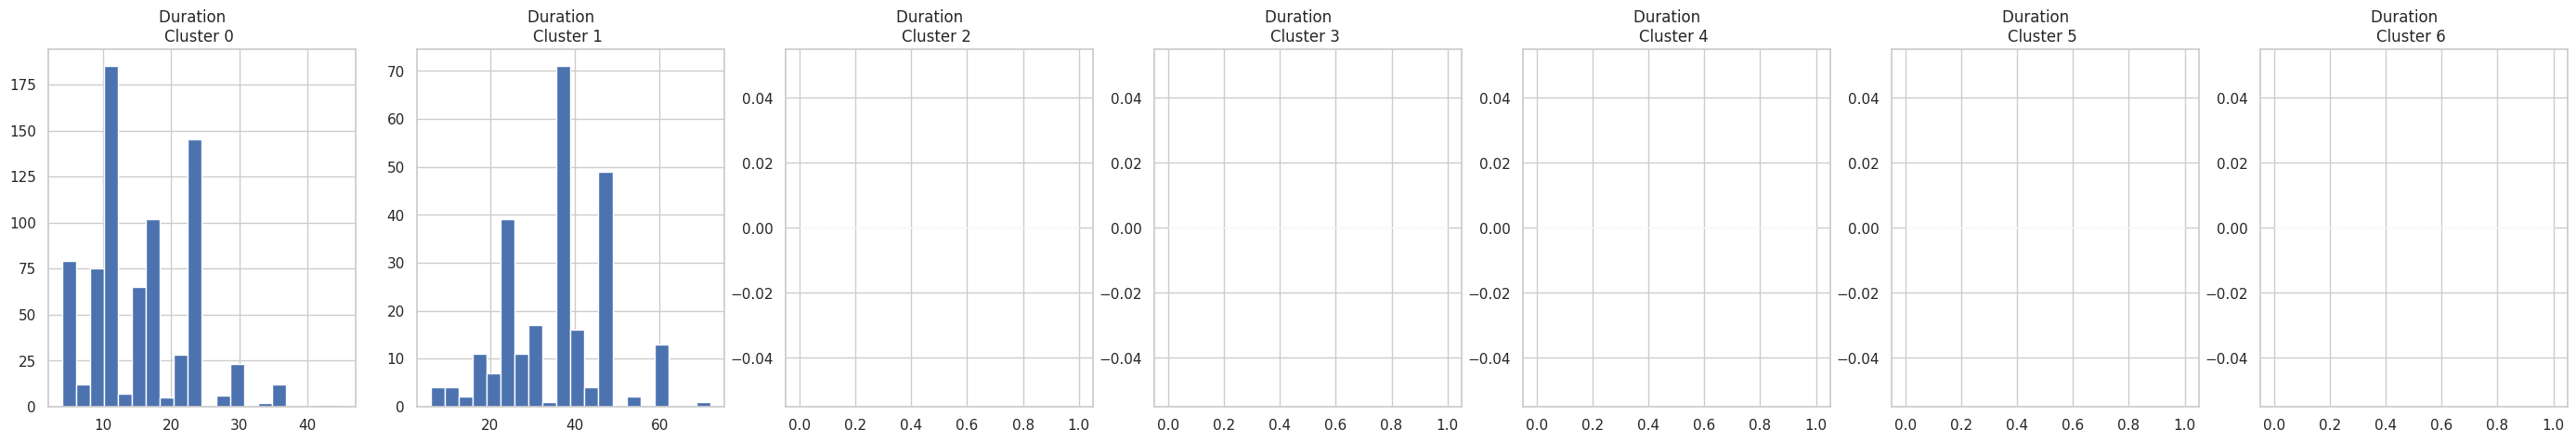

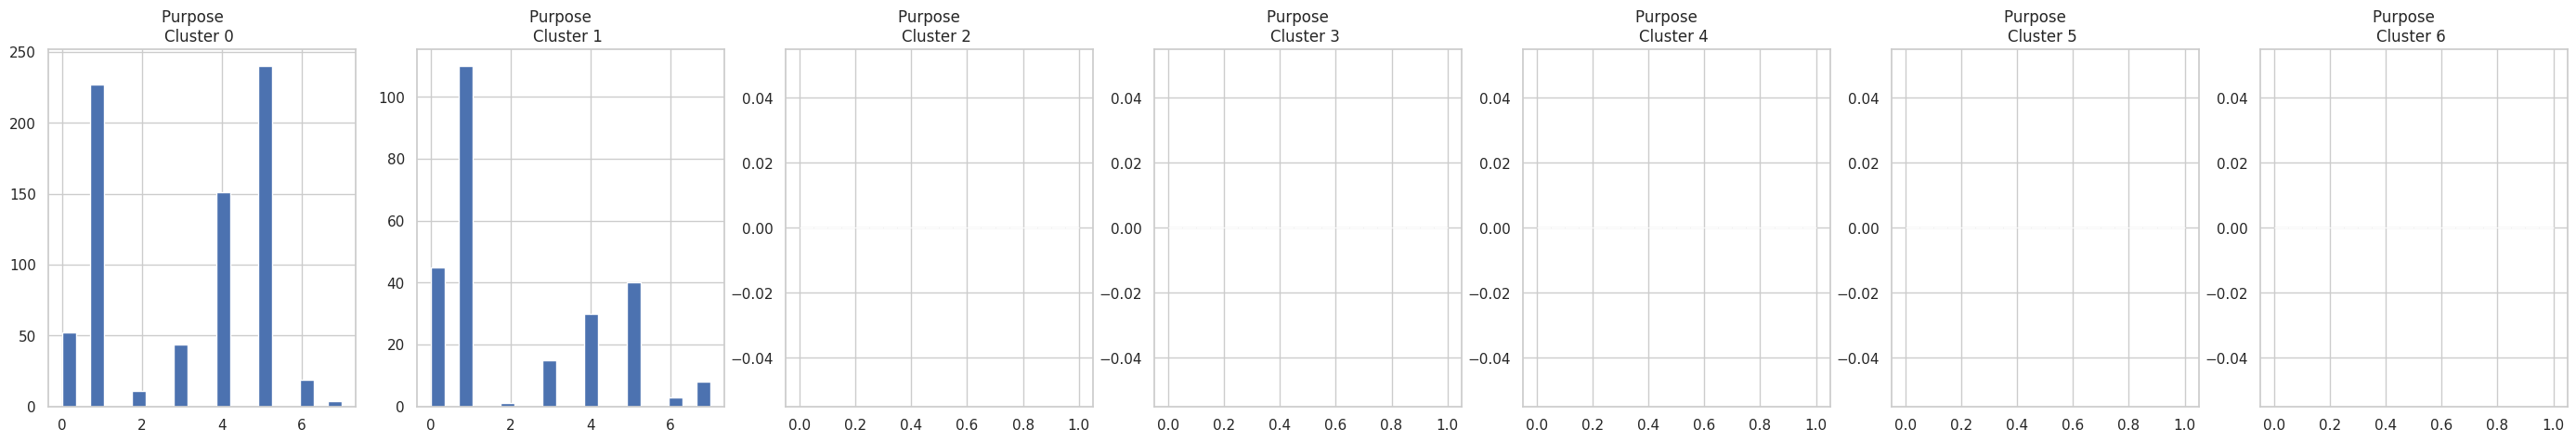

In [107]:
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

## PCA

In [108]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)

In [109]:
principal_comp

array([[-0.53577207,  2.5571    ],
       [ 1.14729238, -2.34544275],
       [-0.69804841,  1.5862958 ],
       ...,
       [-0.75487099,  0.86169967],
       [ 1.35736872,  0.05751514],
       [ 1.58452746, -0.79108044]])

In [110]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.535772,2.557100
1,1.147292,-2.345443
2,-0.698048,1.586296
3,2.866262,0.769194
4,1.825505,2.008131


In [111]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.535772,2.557100,0
1,1.147292,-2.345443,1
2,-0.698048,1.586296,0
3,2.866262,0.769194,1
4,1.825505,2.008131,1


In [112]:
unique_clusters = pca_df['cluster'].nunique()

In [113]:
palette = sns.color_palette("Set1", n_colors=unique_clusters)


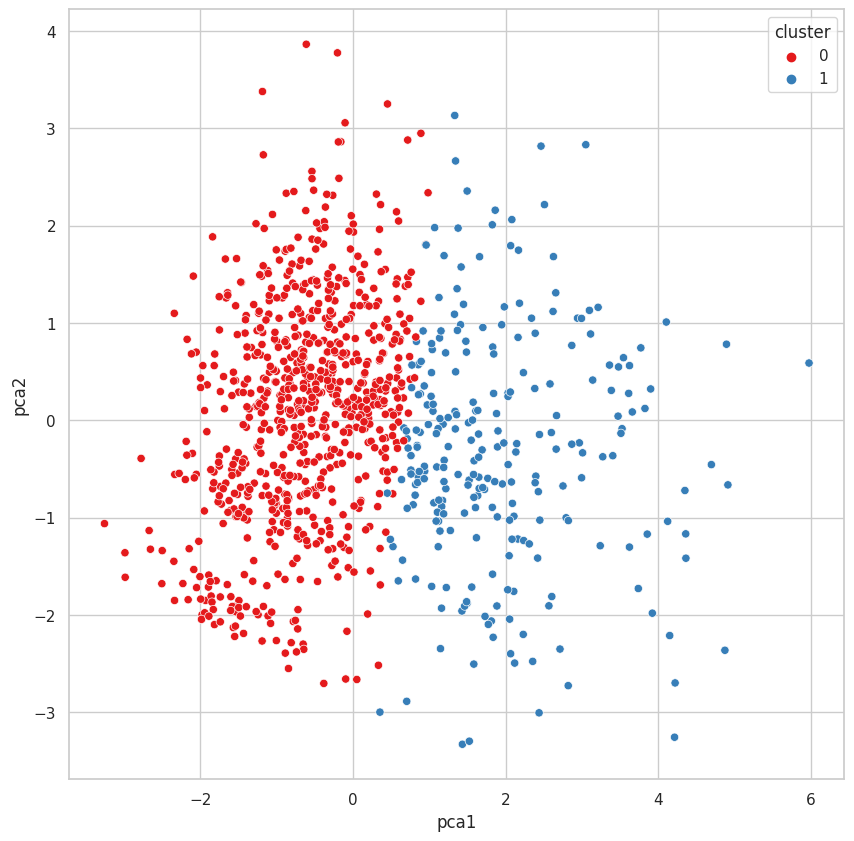

In [114]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=palette)
plt.show()